## Dog Breed Classification

In this project we will use traditional CNN, CNN with data augmentation and finally transfer Learning by VGG16 model with weights pre-trained on Imagenet to solve the dog breed classification problem

## Importing Basic libraries

In [0]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
#importing tensorflow 2 
% tensorflow_version 2.x
import tensorflow as tf

TensorFlow 2.x selected.


### Load Dataset Files

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
os.getcwd()

'/content'

Now, upload the given dataset file shared with you in your google drive and give its path for the below given `project_path` variable. For example, a path is given below according to the file path in our google drive. You need to change this to match the path of yours.

In [0]:
project_path = r"/content/drive/My Drive/AIML_Projects/DogBreed_Classification/"

> - path of given dataset has been set in `'project_path'` so that it will be easy use further.

In [0]:
project_path

'/content/drive/My Drive/AIML_Projects/DogBreed_Classification/'

Run the below code to extract all the images in the train.zip files given in the dataset. We are going to use these images as train and validation sets and their labels in further steps.

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'train.zip', 'r') as z:
  z.extractall()

Repeat the same step for test.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'test.zip', 'r') as z:
  z.extractall()

Repeat the same step for sample_submission.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'sample_submission.csv.zip', 'r') as z:
  z.extractall()

Repeat the same step for labels.csv.zip

In [0]:
from zipfile import ZipFile
with ZipFile(project_path+'labels.csv.zip', 'r') as z:
  z.extractall()

After this process, we will have 4 files - Train folder, test folder and labels.csv and sample_submission.csv as part of your google drive

### Read labels.csv file using pandas

In [0]:
labels = pd.read_csv('/content/labels.csv')

### Let's look for the first 10 rows of labels

In [0]:
labels.head(10)

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
5,002211c81b498ef88e1b40b9abf84e1d,bedlington_terrier
6,00290d3e1fdd27226ba27a8ce248ce85,bedlington_terrier
7,002a283a315af96eaea0e28e7163b21b,borzoi
8,003df8b8a8b05244b1d920bb6cf451f9,basenji
9,0042188c895a2f14ef64a918ed9c7b64,scottish_deerhound


### Print the count of each category of Dogs given in the dataset



In [0]:
pd.DataFrame(labels.breed.value_counts())

,breed
scottish_deerhound,126
maltese_dog,117
afghan_hound,116
entlebucher,115
bernese_mountain_dog,114
...,...
golden_retriever,67
komondor,67
brabancon_griffon,67
eskimo_dog,66


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  """Entry point for launching an IPython kernel.


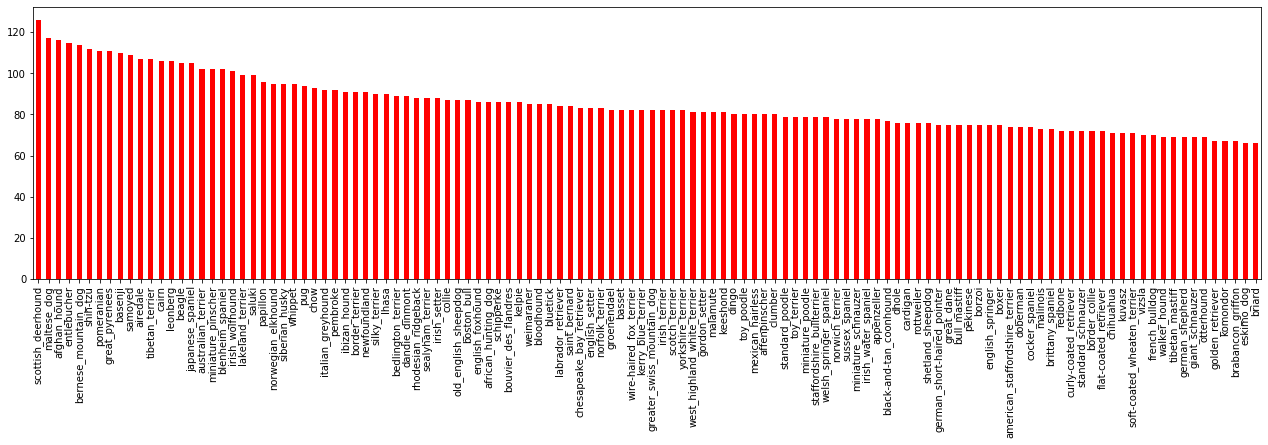

In [0]:
labels['breed'].value_counts().plot('bar', figsize=(22,5),color='r')

> - There are total 120 dog breed category as shown above.

### Get one-hot encodings of labels

In [0]:
# Converting labels to one hot encoding

label_one_hot = pd.get_dummies(labels, columns=['breed'])

In [0]:
label_one_hot.head()

,id,breed_affenpinscher,breed_afghan_hound,breed_african_hunting_dog,breed_airedale,breed_american_staffordshire_terrier,breed_appenzeller,breed_australian_terrier,breed_basenji,breed_basset,breed_beagle,breed_bedlington_terrier,breed_bernese_mountain_dog,breed_black-and-tan_coonhound,breed_blenheim_spaniel,breed_bloodhound,breed_bluetick,breed_border_collie,breed_border_terrier,breed_borzoi,breed_boston_bull,breed_bouvier_des_flandres,breed_boxer,breed_brabancon_griffon,breed_briard,breed_brittany_spaniel,breed_bull_mastiff,breed_cairn,breed_cardigan,breed_chesapeake_bay_retriever,breed_chihuahua,breed_chow,breed_clumber,breed_cocker_spaniel,breed_collie,breed_curly-coated_retriever,breed_dandie_dinmont,breed_dhole,breed_dingo,breed_doberman,...,breed_norwegian_elkhound,breed_norwich_terrier,breed_old_english_sheepdog,breed_otterhound,breed_papillon,breed_pekinese,breed_pembroke,breed_pomeranian,breed_pug,breed_redbone,breed_rhodesian_ridgeback,breed_rottweiler,breed_saint_bernard,breed_saluki,breed_samoyed,breed_schipperke,breed_scotch_terrier,breed_scottish_deerhound,breed_sealyham_terrier,breed_shetland_sheepdog,breed_shih-tzu,breed_siberian_husky,breed_silky_terrier,breed_soft-coated_wheaten_terrier,breed_staffordshire_bullterrier,breed_standard_poodle,breed_standard_schnauzer,breed_sussex_spaniel,breed_tibetan_mastiff,breed_tibetan_terrier,breed_toy_poodle,breed_toy_terrier,breed_vizsla,breed_walker_hound,breed_weimaraner,breed_welsh_springer_spaniel,breed_west_highland_white_terrier,breed_whippet,breed_wire-haired_fox_terrier,breed_yorkshire_terrier
0,000bec180eb18c7604dcecc8fe0dba07,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,001513dfcb2ffafc82cccf4d8bbaba97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,001cdf01b096e06d78e9e5112d419397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,00214f311d5d2247d5dfe4fe24b2303d,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0021f9ceb3235effd7fcde7f7538ed62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Preparing training dataset
1. Write a code which reads each and every id from labels.csv file and loads the corresponding image (in RGB - 128, 128, 3) from the train folder. <br>
2. Create 2 variables <br> 
     a.  x_train - Should have all the images of the dogs from train folder <br>
     b.  y_train - Corresponding label of the dog <br>
<u>Note:</u> The id of the dog images and its corresponding labels are available in labels.csv file   
<u>Hint:</u> Watch the video shared on "Preparing the training dataset" if you face issue on creating the training dataset

In [0]:
from tqdm import tqdm
import cv2

In [0]:
x_train = []
y_train = []

In [0]:
for f, img in tqdm(labels.values):
    train_img = cv2.imread('./train/{}.jpg'.format(f), 1)
    train_img_resize = cv2.resize(train_img,(128,128))
    x_train.append(train_img_resize)
    y_train.append(img)

100%|██████████| 10222/10222 [00:26<00:00, 379.12it/s]


In [0]:
train_img.shape

(375, 500, 3)

> - Shape of last original image

In [0]:
train_img_resize.shape

(128, 128, 3)

> - Shape of last image with resize of 128*128 having 3 channels i.e. it's a RGB image

In [0]:
np.array(x_train).shape

(10222, 128, 128, 3)

In [0]:
x_train[0]

array([[[ 69, 116, 173],
        [ 38,  91, 136],
        [102, 166, 204],
        ...,
        [130, 204, 237],
        [ 85, 193, 220],
        [ 59, 138, 170]],

       [[ 42,  77, 118],
        [142, 180, 216],
        [119, 162, 197],
        ...,
        [ 80, 152, 194],
        [101, 183, 218],
        [ 74, 177, 212]],

       [[ 65, 107, 151],
        [ 57, 103, 147],
        [ 66, 107, 153],
        ...,
        [ 37, 121, 172],
        [ 73, 145, 183],
        [ 64, 168, 207]],

       ...,

       [[ 77, 119, 190],
        [ 66, 121, 186],
        [ 66, 122, 183],
        ...,
        [ 70,  91, 159],
        [ 59,  89, 154],
        [ 91, 132, 184]],

       [[ 65, 118, 185],
        [ 72, 124, 190],
        [ 74, 125, 187],
        ...,
        [ 54,  63, 132],
        [ 74, 116, 169],
        [121, 169, 223]],

       [[ 63, 116, 183],
        [ 73, 125, 191],
        [ 76, 127, 190],
        ...,
        [ 50,  51, 127],
        [ 31,  62, 128],
        [ 90, 145, 198]]

> - Pixel values of 1'st image (Resized to 128 * 128 * 3)

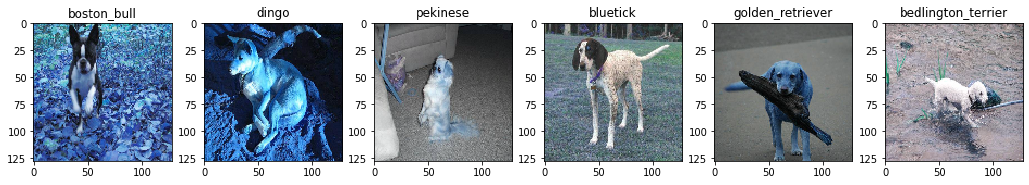

In [0]:
#from google.colab.patches import cv2_imshow
plt.figure(figsize=(30,30))

for i in range(6):
  plt.subplot(10,10,i+1)
  plt.imshow(x_train[i])
  plt.title(labels['breed'][i])

> - Displaying the first 6 images of dataset loaded in x_train

Normalize the training data and convert into 4 dimensions so that it can be used as an input to conv layers in the model

In [0]:
x_train_array = np.array(x_train)

> - Converted list of x_train to numpy array

In [0]:
x_train_array.shape

(10222, 128, 128, 3)

> - Dataset is having total 10222 images with size `128*128*3`

In [0]:
x_train_nrm = x_train_array / 255

> - Normalized the data (i.e. Pixel values).

In [0]:
x_train_dim = tf.keras.backend.expand_dims(x_train_nrm,axis=1)

> - Added one more dimension to current data format

In [0]:
x_train_dim = np.array(x_train_dim)

In [0]:
x_train_dim[1,:].shape

(1, 128, 128, 3)

In [0]:
tf.shape(x_train_dim)

<tf.Tensor: shape=(5,), dtype=int32, numpy=array([10222,     1,   128,   128,     3], dtype=int32)>

> - Converted the image data to 4 dimension using expand_dims.

### Split the training and validation data from `x_train_data` and `y_train_data` obtained from above step

In [0]:
x_train_data = x_train_dim
y_train_data = label_one_hot.iloc[:,1:]

In [0]:
y_train_data.shape

(10222, 120)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_val, y_train, y_val = train_test_split(x_train_array, y_train_data, test_size=0.2, random_state=42)

In [0]:
print('shape of X_train_data', X_train.shape,  '\n ', ' shape of X_val_data ', X_val.shape)

shape of X_train_data (8177, 128, 128, 3) 
   shape of X_val_data  (2045, 128, 128, 3)


In [0]:
print ('shape of y_train_data', y_train.shape,  '\n ', ' shape of y_val_data ', y_val.shape)

shape of y_train_data (8177, 120) 
   shape of y_val_data  (2045, 120)


### Loading the test data
Read the id column from the samples_submission.csv and store it in test_img

In [0]:
samp_sub = pd.read_csv('/content/sample_submission.csv')

In [0]:
samp_sub.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,000621fb3cbb32d8935728e48679680e,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
1,00102ee9d8eb90812350685311fe5890,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
2,0012a730dfa437f5f3613fb75efcd4ce,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333
3,001510bc8570bbeee98c8d80c8a95ec1,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,...,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333,0.008333

In [0]:
test_img = samp_sub.id

In [0]:
test_img.head()

0    000621fb3cbb32d8935728e48679680e
1    00102ee9d8eb90812350685311fe5890
2    0012a730dfa437f5f3613fb75efcd4ce
3    001510bc8570bbeee98c8d80c8a95ec1
4    001a5f3114548acdefa3d4da05474c2e
Name: id, dtype: object

Run the below code to load the test image files in x_test_feature

In [0]:
img_rows = 128
img_cols = 128

In [0]:
x_test_feature = []
i = 0 # initialisation
for f in tqdm(test_img.values): # f for format ,jpg
    img = cv2.imread('./test/{}.jpg'.format(f), 0)
    img_resize = cv2.resize(img, (img_rows, img_cols)) 
    x_test_feature.append(img_resize)

100%|██████████| 10357/10357 [00:16<00:00, 639.44it/s]


Normalize the test data and convert it into 4 dimensions

In [0]:
x_test_array = np.array(x_test_feature)

In [0]:
x_test_nrm = x_test_array / 255

In [0]:
x_test_nrm.shape

(10357, 128, 128)

In [0]:
x_test_dim = tf.keras.backend.expand_dims(x_test_nrm, axis=-1)

### Build a basic conv neural network with 2 conv layers (kernel sizes - 5 and 3) add layers as mentioned below for classification.

1. Add a Dense layer with 256 neurons with `relu` activation

2. Add a Dense layer with 120 neurons as final layer (as there are 120 classes in the given dataset) with `softmax` activation for classifiaction. 

In [0]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout,Activation,Reshape,MaxPooling2D
from tensorflow.keras.backend import clear_session
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.metrics import Accuracy

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

In [0]:
# Sequential
model = Sequential()

# 1st CNN layer
model.add(Conv2D(32, (5, 5), padding='same',input_shape=(img_rows,img_cols,3,)))
model.add(Activation('relu'))

#normalize data
model.add(BatchNormalization())

# 2nd CNN layer 
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

# Batcth normalizing
model.add(BatchNormalization())

In [0]:
# Flattening the layer 
model.add(Flatten())

# Dens layer 
model.add(Dense(256,activation ='relu'))
# Drop out 
model.add(Dropout(0.2))

# Output layer 
model.add(Dense(120,activation='softmax'))

### Use batch_size = 128 and epochs = 10 and execute the model

In [0]:
#Specify Loass and Optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
activation (Activation)      (None, 128, 128, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 64)      18496     
_________________________________________________________________
activation_1 (Activation)    (None, 126, 126, 64)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 64)      256       
_________________________________________________________________
flatten (Flatten)            (None, 1016064)           0

In [0]:
# CallBacks 
chkkpt = tf.keras.callbacks.ModelCheckpoint('./dog_breed.h5', monitor='val_acc', save_best_only=True,)

> - Setting check point to save the best model only.

In [0]:
history = model.fit(X_train,y_train,          
          validation_data=(X_val,y_val),
          epochs=10,
          batch_size=128, callbacks=[chkkpt],workers=4,verbose = 1)

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 18s 2ms/sample - loss: 13.2042 - accuracy: 0.0103 - val_loss: 58.3354 - val_accuracy: 0.0098
Epoch 2/10
8177/8177 [==============================] - 10s 1ms/sample - loss: 4.9128 - accuracy: 0.0158 - val_loss: 5.4957 - val_accuracy: 0.0093
Epoch 3/10
8177/8177 [==============================] - 10s 1ms/sample - loss: 4.8587 - accuracy: 0.0188 - val_loss: 5.8866 - val_accuracy: 0.0083
Epoch 4/10
8177/8177 [==============================] - 10s 1ms/sample - loss: 4.8383 - accuracy: 0.0213 - val_loss: 5.4011 - val_accuracy: 0.0088
Epoch 5/10
8177/8177 [==============================] - 10s 1ms/sample - loss: 4.7814 - accuracy: 0.0203 - val_loss: 5.2098 - val_accuracy: 0.0088
Epoch 6/10
8177/8177 [==============================] - 10s 1ms/sample - loss: 4.7803 - accuracy: 0.0215 - val_loss: 5.3684 - val_accuracy: 0.0093
Epoch 7/10
8177/8177 [==============================] - 10s 1ms/samp

#The model accuracy is very poor !!!!

### Use Data Augmentation in the above model to see if the accuracy improves


In [0]:
img_size = 128
img_depth = 3

In [0]:
#ImageDataGenerator declaration with 20% data as test (80% for training)
img_generator= tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                               width_shift_range=0.2,
                                                               height_shift_range=0.2,
                                                               horizontal_flip=True,
                                                               vertical_flip=True,
                                                               validation_split=0.2)

### Using the above objects, create the image generators with variable names `train_generator` and `val_generator`

You need to use train_datagen.flow() and val_datagen.flow()

In [0]:
#Build training generator. 
train_generator = img_generator.flow(X_train,y_train,batch_size=64)

In [0]:
#Build test generator
val_generator = img_generator.flow(X_val,y_val,batch_size=64)

### Fit the model using fit_generator() using `train_generator` and `val_generator` from the above step with 10 epochs

In [0]:
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('./dogcnn.h5', 
                                                    save_best_only=True, 
                                                    monitor='val_acc', 
                                                    mode='max', 
                                                    verbose=1)

In [0]:
model.fit(train_generator,
                    epochs=10,
                    steps_per_epoch= X_train.shape[0]//128,  #Number of training images//batch_size
                    validation_data=val_generator,
                    validation_steps = X_val.shape[0]//128, #Number of test images//batch_size
                    callbacks=[model_checkpoint],workers=4
                    )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 63 steps, validate for 15 steps
Epoch 1/10
63/63 [==============================] - 11s 182ms/step - loss: 4.7947 - accuracy: 0.0097 - val_loss: 4.7859 - val_accuracy: 0.0104
Epoch 2/10
63/63 [==============================] - 12s 191ms/step - loss: 4.8042 - accuracy: 0.0094 - val_loss: 9.3438 - val_accuracy: 0.0115
Epoch 3/10
63/63 [==============================] - 12s 187ms/step - loss: 4.7827 - accuracy: 0.0119 - val_loss: 4.7861 - val_accuracy: 0.0104
Epoch 4/10
63/63 [==============================] - 12s 187ms/step - loss: 4.7771 - accuracy: 0.0119 - val_loss: 4.7855 - val_accuracy: 0.0104
Epoch 5/10
63/63 [==============================] - 12s 196ms/step - loss: 4.7785 - accuracy: 0.0119 - val_loss: 4.7872 - val_accuracy: 0.0104
Epoch 6/10
63/63 [==============================] - 12s 186ms/step - loss: 4.7790 - accuracy: 0.0126 - val_loss: 4.7874 - val_accuracy: 0.0104
Epoch 7/10
63/63 [==============================] 

# Model accuracy is still poor!!!

### Lets use Transfer Learning

Download the vgg wieght file from here : https://github.com/MinerKasch/applied_deep_learning/blob/master/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5

Use the below code to load VGG16 weights trained on ImageNet

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input
# Instantiate the model with the pre-trained weights (no top)
base_model= tf.keras.applications.VGG16(weights=('/content/drive/My Drive/AIML_Projects/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'),
                 include_top=False, pooling='avg')

Using TensorFlow backend.


Print the summary of the base_model

In [0]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

### Add the following classification layers to the imported VGG Model <br>
1. Flatten Layer
2. Dense layer with 1024 neurons with activation as Relu
3. Dense layer with 256 neurons with activation as Relu
4. Dense layer with 120 neurons with activation as Softmax

In [0]:
x=base_model.output
x=Flatten()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(256,activation='relu')(x) #dense layer 2
preds=Dense(120,activation='softmax')(x)

In [0]:
from tensorflow.keras.models import Model
model_vgg=Model(inputs=base_model.input,outputs=preds)

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in model_vgg.layers:
  if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in model_vgg.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))

input_1
False
block1_conv1
False
block1_conv2
False
block1_pool
False
block2_conv1
False
block2_conv2
False
block2_pool
False
block3_conv1
False
block3_conv2
False
block3_conv3
False
block3_pool
False
block4_conv1
False
block4_conv2
False
block4_conv3
False
block4_pool
False
block5_conv1
False
block5_conv2
False
block5_conv3
False
block5_pool
False
global_average_pooling2d
False
flatten_1
False
dense_2
True
dense_3
True
dense_4
True


### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_vgg.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [0]:
chkpt_vgg = tf.keras.callbacks.ModelCheckpoint('./dog.h5', 
                                           monitor='val_acc', save_best_only=True,)

In [0]:
history_vgg = model_vgg.fit(X_train,y_train,
                    epochs=10,validation_data=(X_val,y_val),
                    callbacks=[chkpt_vgg],workers=4)

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 10s 1ms/sample - loss: 4.8458 - accuracy: 0.0600 - val_loss: 3.8759 - val_accuracy: 0.1364
Epoch 2/10
8177/8177 [==============================] - 8s 1ms/sample - loss: 3.1371 - accuracy: 0.2355 - val_loss: 2.8850 - val_accuracy: 0.2621
Epoch 3/10
8177/8177 [==============================] - 8s 1ms/sample - loss: 2.2865 - accuracy: 0.3836 - val_loss: 2.5935 - val_accuracy: 0.3413
Epoch 4/10
8177/8177 [==============================] - 8s 1ms/sample - loss: 1.8542 - accuracy: 0.4801 - val_loss: 2.6614 - val_accuracy: 0.3487
Epoch 5/10
8177/8177 [==============================] - 8s 1ms/sample - loss: 1.4929 - accuracy: 0.5676 - val_loss: 2.6934 - val_accuracy: 0.3682
Epoch 6/10
8177/8177 [==============================] - 8s 1ms/sample - loss: 1.1589 - accuracy: 0.6511 - val_loss: 2.7511 - val_accuracy: 0.3707
Epoch 7/10
8177/8177 [==============================] - 8s 1ms/sample - los

> - From the above we can see that model is not performing well.
> - It is overfitting model as there is huge difference between training and test acccuaracy

In [0]:
history_vgg = model_vgg.fit(X_train,y_train,
                    epochs=100,validation_data=(X_val,y_val),
                    callbacks=[chkpt_vgg],workers=4)

Train on 8177 samples, validate on 2045 samples
Epoch 1/100
8177/8177 [==============================] - 9s 1ms/sample - loss: 0.3299 - accuracy: 0.8943 - val_loss: 3.9748 - val_accuracy: 0.3800
Epoch 2/100
8177/8177 [==============================] - 9s 1ms/sample - loss: 0.2636 - accuracy: 0.9183 - val_loss: 4.1741 - val_accuracy: 0.3858
Epoch 3/100
8177/8177 [==============================] - 9s 1ms/sample - loss: 0.3123 - accuracy: 0.8994 - val_loss: 4.6871 - val_accuracy: 0.3721
Epoch 4/100
8177/8177 [==============================] - 9s 1ms/sample - loss: 0.2551 - accuracy: 0.9208 - val_loss: 4.6879 - val_accuracy: 0.3741
Epoch 5/100
8177/8177 [==============================] - 9s 1ms/sample - loss: 0.2149 - accuracy: 0.9324 - val_loss: 4.9290 - val_accuracy: 0.3707
Epoch 6/100
8177/8177 [==============================] - 9s 1ms/sample - loss: 0.2808 - accuracy: 0.9143 - val_loss: 5.0333 - val_accuracy: 0.3667
Epoch 7/100
8177/8177 [==============================] - 9s 1ms/sample

### Make all the layers in the base_model (VGG16) to be non-trainable

In [0]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in model_vgg.layers:
  if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in model_vgg.layers:
  print (colored(layer.name, 'blue'))
  print (colored(layer.trainable, 'red'))

input_1
False
block1_conv1
False
block1_conv2
False
block1_pool
False
block2_conv1
False
block2_conv2
False
block2_pool
False
block3_conv1
False
block3_conv2
False
block3_conv3
False
block3_pool
False
block4_conv1
False
block4_conv2
False
block4_conv3
False
block4_pool
False
block5_conv1
False
block5_conv2
False
block5_conv3
False
block5_pool
False
global_average_pooling2d
False
flatten_8
False
dropout_2
False
dense_22
True
dense_23
True
dense_24
True


### Fit and compile the model with batch_size = 128 and epochs = 10 and execute the model

Try to get training and validation accuracy to be more than 90%

In [0]:
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_vgg.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [0]:
chkpt_vgg_1 = tf.keras.callbacks.ModelCheckpoint('./dog_breed.h5', 
                                           monitor='val_acc', save_best_only=True,)

In [0]:
history_vgg = model_vgg.fit(X_train,y_train,
                    epochs=10,validation_data=(X_val,y_val),
                    callbacks=[chkpt_vgg],workers=4)

Train on 8177 samples, validate on 2045 samples
Epoch 1/10
8177/8177 [==============================] - 10s 1ms/sample - loss: 4.8458 - accuracy: 0.0600 - val_loss: 3.8759 - val_accuracy: 0.1364
Epoch 2/10
8177/8177 [==============================] - 8s 1ms/sample - loss: 3.1371 - accuracy: 0.2355 - val_loss: 2.8850 - val_accuracy: 0.2621
Epoch 3/10
8177/8177 [==============================] - 8s 1ms/sample - loss: 2.2865 - accuracy: 0.3836 - val_loss: 2.5935 - val_accuracy: 0.3413
Epoch 4/10
8177/8177 [==============================] - 8s 1ms/sample - loss: 1.8542 - accuracy: 0.4801 - val_loss: 2.6614 - val_accuracy: 0.3487
Epoch 5/10
8177/8177 [==============================] - 8s 1ms/sample - loss: 1.4929 - accuracy: 0.5676 - val_loss: 2.6934 - val_accuracy: 0.3682
Epoch 6/10
8177/8177 [==============================] - 8s 1ms/sample - loss: 1.1589 - accuracy: 0.6511 - val_loss: 2.7511 - val_accuracy: 0.3707
Epoch 7/10
8177/8177 [==============================] - 8s 1ms/sample - los

> - From the above we can see that model is not performing well.
> - It is overfitting model as there is huge difference between training and test acccuaracy

# Let's try to run for more epoch

In [0]:
history_vgg = model_vgg.fit(X_train,y_train,
                    epochs=100,validation_data=(X_val,y_val),
                    callbacks=[chkpt_vgg],workers=4)

Train on 8177 samples, validate on 2045 samples
Epoch 1/100
8177/8177 [==============================] - 9s 1ms/sample - loss: 0.3299 - accuracy: 0.8943 - val_loss: 3.9748 - val_accuracy: 0.3800
Epoch 2/100
8177/8177 [==============================] - 9s 1ms/sample - loss: 0.2636 - accuracy: 0.9183 - val_loss: 4.1741 - val_accuracy: 0.3858
Epoch 3/100
8177/8177 [==============================] - 9s 1ms/sample - loss: 0.3123 - accuracy: 0.8994 - val_loss: 4.6871 - val_accuracy: 0.3721
Epoch 4/100
8177/8177 [==============================] - 9s 1ms/sample - loss: 0.2551 - accuracy: 0.9208 - val_loss: 4.6879 - val_accuracy: 0.3741
Epoch 5/100
8177/8177 [==============================] - 9s 1ms/sample - loss: 0.2149 - accuracy: 0.9324 - val_loss: 4.9290 - val_accuracy: 0.3707
Epoch 6/100
8177/8177 [==============================] - 9s 1ms/sample - loss: 0.2808 - accuracy: 0.9143 - val_loss: 5.0333 - val_accuracy: 0.3667
Epoch 7/100
8177/8177 [==============================] - 9s 1ms/sample